<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2024/blob/main/Naive_Bayes_Classifier_for_the_Early_Detection_of_Cardiovascular_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Statistical Summary of the Dataset:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


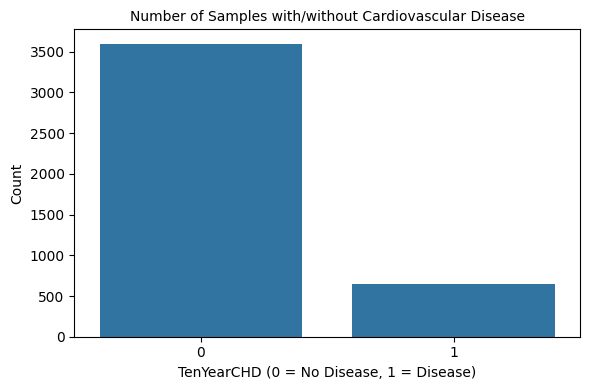


⚖️ Class Distribution Before Oversampling:
TenYearCHD
0    3101
1     557
Name: count, dtype: int64

✅ Class Distribution After Oversampling:
TenYearCHD
0    3101
1    3101
Name: count, dtype: int64

🔍 Top 8 Features for Male: ['age', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose']


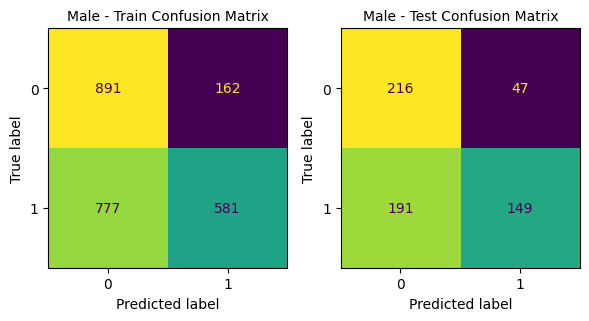


📈 Performance Metrics for Male:


,Accuracy,Precision,Recall,F1-Score
Train,0.610535,0.781965,0.427835,0.55307
Test,0.605307,0.760204,0.438235,0.55597


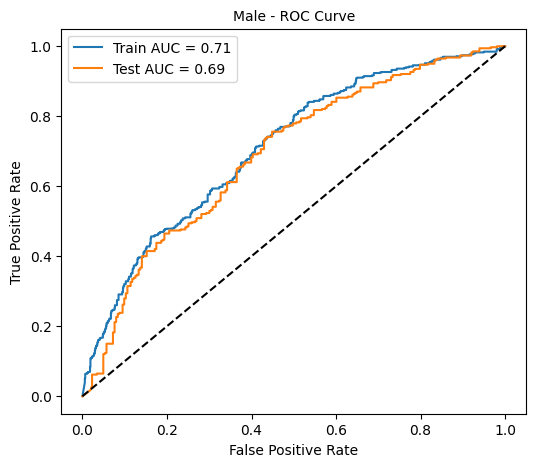


🔍 Top 8 Features for Female: ['age', 'BPMeds', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']


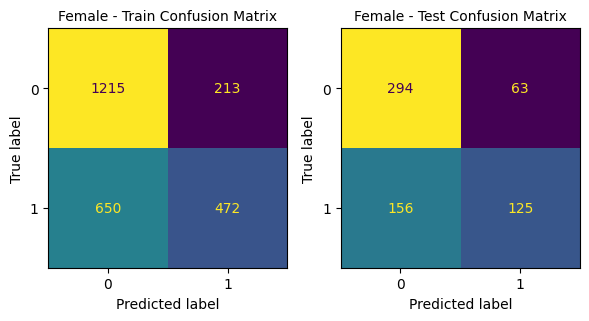


📈 Performance Metrics for Female:


,Accuracy,Precision,Recall,F1-Score
Train,0.661569,0.689051,0.420677,0.522413
Test,0.656740,0.664894,0.444840,0.533049


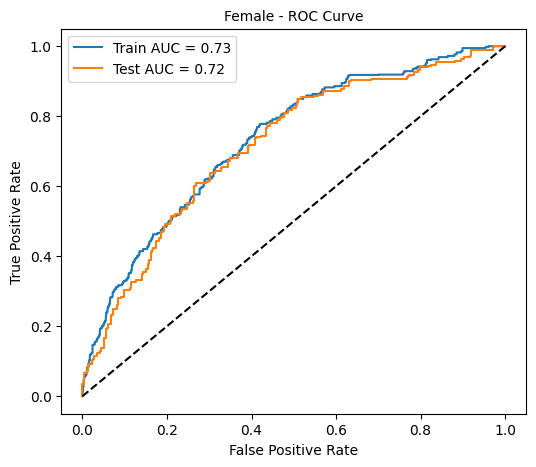


📋 Final Combined Performance Metrics:


,Accuracy,Precision,Recall,F1-Score
Male - Train,0.610535,0.781965,0.427835,0.553070
Male - Test,0.605307,0.760204,0.438235,0.555970
Female - Train,0.661569,0.689051,0.420677,0.522413
Female - Test,0.656740,0.664894,0.444840,0.533049


In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler

# Create output directory
output_dir = "output_figures"
os.makedirs(output_dir, exist_ok=True)

# Load dataset
df = pd.read_csv('framingham.csv')

# Display statistical summary
print("📊 Statistical Summary of the Dataset:")
display(df.describe())

plt.figure(figsize=(6, 4))  # Optional: control figure size
sns.countplot(data=df, x='TenYearCHD')
plt.title('Number of Samples with/without Cardiovascular Disease', fontsize=10)
plt.xlabel('TenYearCHD (0 = No Disease, 1 = Disease)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'class_distribution.png'))
plt.show()

# Drop missing values
df.dropna(inplace=True)

# Show original class distribution
print("\n⚖️ Class Distribution Before Oversampling:")
print(df['TenYearCHD'].value_counts())

# Balance the dataset using oversampling
ros = RandomOverSampler(random_state=23)
X_resampled, y_resampled = ros.fit_resample(df.drop('TenYearCHD', axis=1), df['TenYearCHD'])
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Show new class distribution
print("\n✅ Class Distribution After Oversampling:")
print(df_balanced['TenYearCHD'].value_counts())

# Split by gender
df_male = df_balanced[df_balanced['male'] == 1].drop(columns=['male'])
df_female = df_balanced[df_balanced['male'] == 0].drop(columns=['male'])

def train_naive_bayes_model(data, label='TenYearCHD', gender='Male'):
    X = data.drop(label, axis=1)
    y = data[label]

    # Feature selection
    selector = SelectKBest(score_func=f_classif, k=8)
    X_selected = selector.fit_transform(X, y)
    top_features = X.columns[selector.get_support()]
    print(f"\n🔍 Top 8 Features for {gender}: {list(top_features)}")

    # Save top features
    pd.Series(top_features).to_csv(os.path.join(output_dir, f'top_features_{gender.lower()}.csv'), index=False)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train model
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # 📊 Confusion Matrix Subplots
    fig, axes = plt.subplots(1, 2, figsize=(6, 5))
    for ax, (dataset_type, y_true, y_pred) in zip(axes, [
        ('Train', y_train, y_train_pred),
        ('Test', y_test, y_test_pred)
    ]):
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=ax, colorbar=False)
        ax.set_title(f'{gender} - {dataset_type} Confusion Matrix', fontsize=10)
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'{gender}_train_test_conf_matrix.png'))
    plt.show()

    # 📈 Metrics
    metrics = {
        'Accuracy': [accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)],
        'Precision': [precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)],
        'Recall': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)],
        'F1-Score': [f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)]
    }
    df_metrics = pd.DataFrame(metrics, index=['Train', 'Test'])
    print(f"\n📈 Performance Metrics for {gender}:")
    display(df_metrics)

    # 📉 ROC Curves
    y_score_train = model.predict_proba(X_train)[:, 1]
    y_score_test = model.predict_proba(X_test)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc(fpr_train, tpr_train):.2f}')
    plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc(fpr_test, tpr_test):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title(f'{gender} - ROC Curve', fontsize=10)
    plt.legend(fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.savefig(os.path.join(output_dir, f'{gender}_roc_curve.png'))
    plt.show()

    return df_metrics

# Train and evaluate
metrics_male = train_naive_bayes_model(df_male, gender='Male')
metrics_female = train_naive_bayes_model(df_female, gender='Female')

# Combine metrics
final_metrics = pd.concat([
    metrics_male.rename(index=lambda x: f'Male - {x}'),
    metrics_female.rename(index=lambda x: f'Female - {x}')
])

print("\n📋 Final Combined Performance Metrics:")
display(final_metrics)


In [28]:
import matplotlib.pyplot as plt
import os
from sklearn.metrics import roc_curve, auc

def plot_roc_subplots(y_train, y_score_train, y_test, y_score_test, gender='', output_dir='output_figures'):
    fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Train ROC subplot
    axes[0].plot(fpr_train, tpr_train, label=f'Train AUC = {auc(fpr_train, tpr_train):.2f}')
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].set_title(f'{gender} - Train ROC Curve', fontsize=10)
    axes[0].set_xlabel('False Positive Rate', fontsize=10)
    axes[0].set_ylabel('True Positive Rate', fontsize=10)
    axes[0].tick_params(axis='x', labelsize=10)
    axes[0].tick_params(axis='y', labelsize=10)
    axes[0].legend(fontsize=10)

    # Test ROC subplot
    axes[1].plot(fpr_test, tpr_test, label=f'Test AUC = {auc(fpr_test, tpr_test):.2f}', color='orange')
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_title(f'{gender} - Test ROC Curve', fontsize=10)
    axes[1].set_xlabel('False Positive Rate', fontsize=10)
    axes[1].set_ylabel('True Positive Rate', fontsize=10)
    axes[1].tick_params(axis='x', labelsize=10)
    axes[1].tick_params(axis='y', labelsize=10)
    axes[1].legend(fontsize=10)

    plt.tight_layout()

    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save figure before showing
    fig.savefig(os.path.join(output_dir, f'roc_subplots_{gender.lower()}.png'))

    # Display the plot
    plt.show()
